<a href="https://colab.research.google.com/github/AymanBard/MachineLearningOption/blob/main/%5B01%5D_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Le perceptron


## Données `Iris`
On commence par récupérer les données à classifier `Iris`. Les attributs (longueur et largeur de la sépale) seront dans $\mathbb{R}^2$, et pour chaque point $x_i \in \mathbb{R}^2$, il faudra prédire sa classe d'appartenance $y_i \in \{-1, 1\}$, où $-1$ correspond à la fleur `Iris Setosa` et $1$ à `Iris Versicolor`.

In [1]:
from sklearn import datasets

donnees = datasets.load_iris()
filtre = donnees['target'] != 2  # Initialement le jeu de données contient une troisième classe, Iris-Virginica, qu'on ignore
attributs = donnees['data'][filtre, :2]  # Initialement le jeu de données contient deux autres attributs, longueur et largeur de la pétale, qu'on ignore
classes = donnees['target'][filtre]
classes[classes == 0] = -1  # On remplace la classe 0 par -1
pos_class = classes == 1

In [3]:
donnees['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
donnees['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
print('nombre de donnes', len(attributs))

nombre de donnes 100


In [24]:
print('attributs des donnes', attributs)

attributs des donnes [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]


In [6]:
print('classes des donnes', classes)

classes des donnes [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


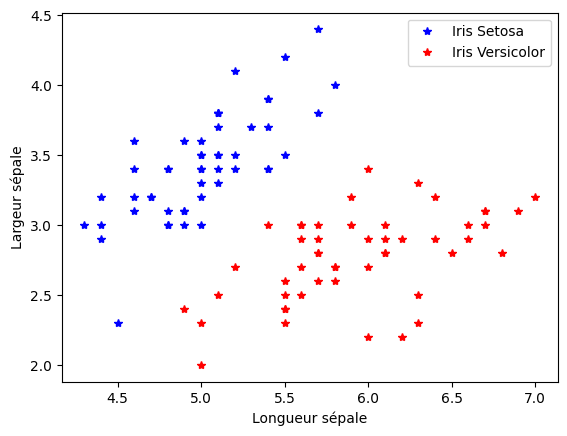

In [2]:
import matplotlib.pyplot as plt
plt.plot(attributs[~pos_class, 0], attributs[~pos_class, 1], '*b')
plt.plot(attributs[pos_class, 0], attributs[pos_class, 1], '*r')
plt.legend(['Iris Setosa', 'Iris Versicolor'])
plt.xlabel('Longueur sépale')
plt.ylabel('Largeur sépale')
plt.show()

## Initialisation et affichage d'un neurone formel

In [3]:
import numpy as np

# On génère des poids d'un neurone formel aléatoirement
w = np.random.randn(2)
b = np.random.randn(1)

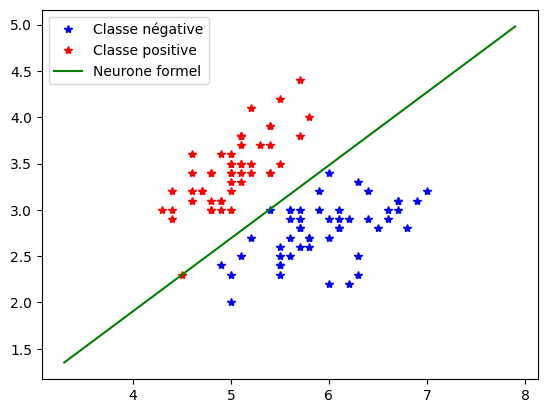

In [47]:
# On visualise les données et la ligne séparatrice produite par le neurone formel
plt.plot(attributs[pos_class, 0], attributs[pos_class, 1], '*b')
plt.plot(attributs[~pos_class, 0], attributs[~pos_class, 1], '*r')
o = np.arange(np.min(attributs[:, 0]) - 1, np.max(attributs[:, 0]) + 1, .1)
a = -(w[0] * o + b) / w[1]
plt.plot(o, a, '-g')
plt.legend(['Classe négative', 'Classe positive', 'Neurone formel'])
plt.show()

## Exercices

### 1
Pour une certaine donnée $x_i$, afficher la classe $\hat{y}_i$ prédite par le neurone formel. Pour ce faire vous pouvez utiliser la fonction `np.dot` qui calcule le produit scalaire entre deux vecteurs, et `np.sign` qui retourne le signe d'un réel.




In [5]:
'''             Exemple d'utilisation de np.dot et np.sign           '''

print('x_3', attributs[3])  # La quatrième donnée
print(f'Produit scalaire entre x_3 et x_3 = {np.dot(attributs[3], attributs[3])}')
print('Test de la fonction signe : ', np.sign(-9.34), np.sign(0.25))

x_3 [4.6 3.1]
Produit scalaire entre x_3 et x_3 = 30.769999999999996
Test de la fonction signe :  -1.0 1.0


In [6]:
i = 5
prediction_xi = np.sign(np.dot(attributs[i],w)+b)
print(f'donnée x_{i} : {attributs[i]}')
print(f'classe y_{i} : {classes[i]}')
print(f'classe prédite : {prediction_xi}')

donnée x_5 : [5.4 3.9]
classe y_5 : -1
classe prédite : [-1.]


### 2
Compter le nombre de mauvaises classifications. Est-ce que cela correspond à un décompte visuel sur le graphique plus haut?

In [44]:
def nombre_err():
  nombre_err = 0
  for i in range(100):
    if (np.sign(np.dot(attributs[i],w)+b) != classes[i] != classes[i]):
      nombre_err += 1
  return nombre_err

print(nombre_err())

0


### 3
Coder l'algorithme du perceptron puis visualiser le résultat. Augmenter le nombre d'itérations jusqu'à ce que toutes les données soient bien classées.

[  79.2403744  -100.48097228]
[-125.66426643]
0


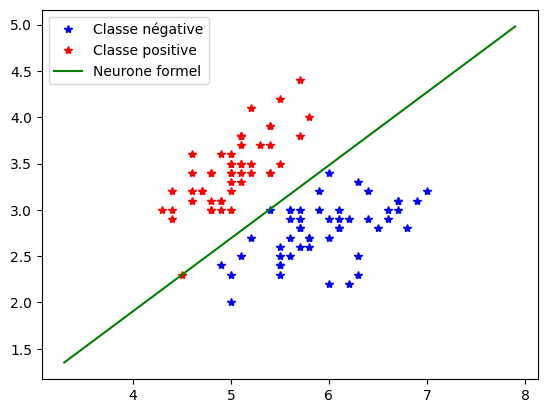

In [50]:
for y in range(2000):
  for i in range(100):
    if (np.sign(np.dot(attributs[i],w)+b) != classes[i]):
      w = w + classes[i]*attributs[i] # w = w + yixi
      b = b + classes[i] # b = b + yi
print(w)
print(b)
print(nombre_err())

# On visualise les données et la ligne séparatrice produite par le neurone formel
plt.plot(attributs[pos_class, 0], attributs[pos_class, 1], '*b')
plt.plot(attributs[~pos_class, 0], attributs[~pos_class, 1], '*r')
o = np.arange(np.min(attributs[:, 0]) - 1, np.max(attributs[:, 0]) + 1, .1)
a = -(w[0] * o + b) / w[1]
plt.plot(o, a, '-g')
plt.legend(['Classe négative', 'Classe positive', 'Neurone formel'])
plt.show()

### 4

Partant de $\theta_0 = (b_0, w_0) = 0$, lancer l'algorithme du perceptron et après chaque mise à jour $k$ où $(x^{k}, y^{k})$ est la donnée mal classée ayant provoqué la mise à jour
- Verifier si $y^{k}(w_{t+1}\cdot x^{k} + b_{t+1}) > y^{k}(w_{t}\cdot x^{k} + b_{t})$.
- Vérifier si $y^{k'}(w_{t+1}\cdot x^{k'} + b_{t+1}) > y^{k'}(w_{t}\cdot x^{k'} + b_{t})$ pour tout $k' \neq k$

### 5

Relancer votre code avec les données ci-dessous, générées aléatoirement. Vérifier que le Perceptron trouve un classifieur pour ces données.

In [ ]:
data_per_class = 15  # on génère 15 points par classe
attributs = np.vstack([np.random.randn(data_per_class, 2) + np.array([[0, 3]]), np.random.randn(data_per_class, 2) + np.array([[3, 0]])])
classes = np.hstack([np.ones(data_per_class), -1 * np.ones(data_per_class)])
pos_class = classes == 1

### 6

Modifier les attributs d'une des données de sorte que les données ne soient plus linéairement séparables. Vérifier que la solution retournée par le Perceptron ne classifie plus toutes les données correctement.